Taken in part from the course [Creative applications of deep learning with tensorflow](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-i)

- [Regression to a noisy sine wave](#regression-1d)
    - [L1 minimization with SGD](#L1-SGD)
    - [Linear regression iterations](#regression-1d-sine)
    - [Regression by a cubic polynomial](#cubic-regression)
    - [Non linear activation](#non-linear-activation)
    - [Simple network with a non linear activation](#net-with-non-linear-activation)
    - [Going deeper](#going-deeper)

In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import data
from scipy.misc import imresize
import IPython.display as ipyd

import tensorflow as tf
#from libs_3 import utils, gif, datasets, dataset_utils, vae, dft
#fom libs_3 import gif, datasets, dataset_utils, vae, dft

%matplotlib inline
plt.style.use('ggplot')

## Download the dataset

Aggregating all images to batch structure
---------------------------------------------


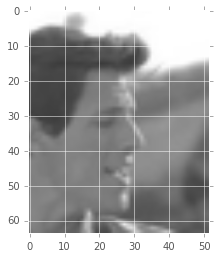

In [8]:
image_dir = './celebs'
n_images  = 10
files = [file_i
         for file_i in os.listdir(image_dir)
         if file_i.endswith('.jpg') or file_i.endswith('.JPG') ][:n_images]

imgs = []
size = (64,64)
for file_i in files:
    f_in = os.path.join(image_dir,file_i)
    img  = Image.open(f_in).convert('LA')
    img.thumbnail(size, Image.ANTIALIAS)
    imgs.append(img)

plt.figure()
plt.imshow(img)
    
print 'Aggregating all images to batch structure\n---------------------------------------------'
data = np.array(imgs)

In [41]:
tf.reset_default_graph()


input_size = size[0]*size[1]
dims       = [512,256,128,64]

X          = tf.placeholder(tf.float32,[None,input_size],name='input')
curr_in    = X
print '--> ',curr_in.get_shape()


# Encoder
W_list = []
for i_layer, n_neurons in enumerate(dims):
    scope_name = 'encoder/layer_{}'.format(i_layer)
    with tf.variable_scope(scope_name):
        W          = tf.get_variable(name='w',
                                 shape = [input_size,n_neurons],
                                 initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))
        o          = tf.matmul(curr_in,W)
        curr_in    = tf.nn.relu(o)
        input_size = n_neurons
        print '--> ',curr_in.get_shape()
        W_list.append(W)
 
# Decoder
W_list.reverse()
for i in xrange(len(dims)):
    scope_name = 'decoder/layer_{}'.format(i)
    o          = tf.matmul(curr_in,tf.transpose(W_list[i]))
    curr_in    = tf.nn.relu(o)
    print '--> ',curr_in.get_shape()

X_pred = curr_in

# Cost function
cost_per_batch = tf.reduce_mean(tf.squared_difference(X, X_pred), 1)
cost           = tf.reduce_mean(cost_per_batch)

print 'Prediction:   ',X_pred.get_shape()
print 'CostPerBatch: ',cost_per_batch.get_shape()
print 'Cost:         ',cost.get_shape()

-->  (?, 4096)
-->  (?, 512)
-->  (?, 256)
-->  (?, 128)
-->  (?, 64)
-->  (?, 128)
-->  (?, 256)
-->  (?, 512)
-->  (?, 4096)
Prediction:    (?, 4096)
CostPerBatch:  (?,)
Cost:          ()
